202101544 마영준

In [7]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()
len(data_list)

100

In [8]:
import numpy
import scipy.special
import matplotlib.pyplot

%matplotlib inline

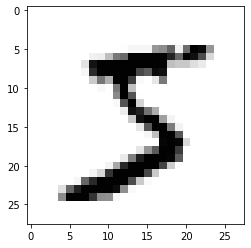

In [12]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [13]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [14]:
# 출력노드는 10
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [39]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력계층의 노드갯수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치행렬 wih와 who
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    


In [40]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
    
learning_rate = 0.1
    
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [41]:
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [42]:

for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
    targets = numpy.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [43]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [44]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


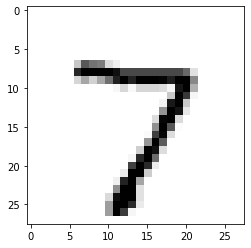

In [45]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [46]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.10578797],
       [0.03830933],
       [0.04218227],
       [0.0752117 ],
       [0.15737321],
       [0.05127985],
       [0.021944  ],
       [0.81973893],
       [0.07122109],
       [0.09227805]])

202101544 마영준